## AlphaSeq Data Processing

For the AlphaSeq data set, we used an already cleaned dataset from a past project that Kaetlyn Gibson worked on, [Machine Learning Approach to a Novel Curated Covid-19 Antibody Database](https://github.com/rferina/covid_machine_learning/tree/main?tab=readme-ov-file#machine-learning-approach-to-a-novel-curated-covid-19-antibody-database). The script below was provided by the [github](https://github.com/rferina/covid_machine_learning/blob/main/data_cleaning_scripts/AlphaSeq/clean_AlphaSeq.py#L5).

The AlphaSeq data set was collected by Emily Engelhart, Ryan Emerson, Leslie Shing, Chelsea Lennartz, Daniel Guion, Mary Kelley, Charles Lin, Randolph Lopez, David Younger & Matthew E. Walsh, [A dataset comprised of binding interactions for 104,972 antibodies against a SARS-CoV-2 peptide](https://www.nature.com/articles/s41597-022-01779-4).

The raw data contained 14 [columns](https://www.nature.com/articles/s41597-022-01779-4/tables/5):
* POI - Alphanumeric label corresponding to amino acid sequence
* Sequence - Single letter amino acid representation of scFv measured.
* Target - Protein target represented by a text label for which the measured antibody interacted with.
* Assay - Unique assay identifier, either 1 or 2
* Replicate - Unique replicate identifier, either 1, 2 or 3
* Pred_affinity - Value representing the score from the AlphaSeq assay. These values estimate the protein-protein dissociation constant in nanomolar, on a log scale, and are the result of empirical measurement. Lower values indicate stronger binding.
* HC - Single letter amino acid sequence of the heavy chain (HC).
* LC - Single letter amino acid sequence of the light chain (LC)
* CDRH1 - Single letter amino acid sequence of a CDR region where H indicates heavy chain and the numerical value represents CDR 1.
* CDRH2 - Single letter amino acid sequence of a CDR region where H indicates heavy chain and the numerical value represents CDR 2.
* CDRH3 - Single letter amino acid sequence of a CDR region where H indicates heavy chain and the numerical value represents CDR 3.
* CDRL1 - Single letter amino acid sequence of a CDR region where L indicates light chain and the numerical value represents CDR 1.
* CDRL2 - Single letter amino acid sequence of a CDR region where L indicates light chain and the numerical value represents CDR 2.
* CDRL3 - Single letter amino acid sequence of a CDR region where L indicates light chain and the numerical value represents CDR 3.

### Load in Raw Data and Count all Unique Values from the Columns

In [ ]:
data_dir = '../data'
alpha_seq_data = pd.read_csv(os.path.join(data_dir, "MITLL_AAlphaBio_Ab_Binding_dataset.csv"))

print(alpha_seq_data.head())

# look at unique values in all columns
poi_unique = alpha_seq_data['POI'].unique()
seq_unique = alpha_seq_data['Sequence'].unique()
target_unique = alpha_seq_data['Target'].unique()
assay_unique = alpha_seq_data['Assay'].unique() #1,2
replicate_unique = alpha_seq_data['Replicate'].unique() #1,2,3
affinity_unique = alpha_seq_data['Pred_affinity'].unique()
hc_unique = alpha_seq_data['HC'].unique()
lc_unique = alpha_seq_data['LC'].unique()
cdrh1_unique = alpha_seq_data['CDRH1'].unique()
cdrh2_unique = alpha_seq_data['CDRH2'].unique()
cdrh3_unique = alpha_seq_data['CDRH3'].unique()
cdrl1_unique = alpha_seq_data['CDRL1'].unique()
cdrl2_unique = alpha_seq_data['CDRL2'].unique()
cdrl3_unique = alpha_seq_data['CDRL3'].unique()

print('hc', len(hc_unique)) # 48928
print('lc', len(lc_unique)) # 56043
print('cdrh1', len(cdrh1_unique)) # 7868
print('cdrh2', len(cdrh2_unique)) # 18150
print('cdrh3', len(cdrh3_unique)) # 6799
print('cdrl1', len(cdrl1_unique)) # 19656 
print('cdrl2', len(cdrl2_unique)) # 5526
print('cdrl3', len(cdrl3_unique)) # 11325

### Find Length of Sequences and Check for Empty Entries

In [ ]:
# check unique lengths of entries to see how long sequences are; if there are missing entries
def len_checker(data, col):
    """
    Takes in dataframe column, returns unique lengths of
    entries in a set.
    """
    len_set = set()
    for item in data[col]:
        length = len(item)
        len_set.add(length)
    return len_set

# poi len set: {8, 9, 10, 11, 12, 14}
print('poi:', len_checker(alpha_seq_data, 'POI'))
# seq len set: {240, 249, 246}
print('sequence:', len_checker(alpha_seq_data, 'Sequence'))
# target len set: {9, 10}
print('target:', len_checker(alpha_seq_data, 'Target'))
# doesn't work for assay, replicate, or pred_affinity because they're integers not in a list
# HC len set: {117, 118, 119}
print('hc:', len_checker(alpha_seq_data, 'HC'))
# LC len set: {113, 115, 108}
print('lc:', len_checker(alpha_seq_data, 'LC'))
# cdrh1 len set: {10}
print('cdrh1:', len_checker(alpha_seq_data, 'CDRH1'))
# cdrh2: {16}
print('cdrh2:', len_checker(alpha_seq_data, 'CDRH2'))
# cdrh3: {8, 9, 10}
print('cdrh3:', len_checker(alpha_seq_data, 'CDRH3'))
# cdrl1: {17, 11, 14}
print('cdrl1:', len_checker(alpha_seq_data, 'CDRL1'))
# cdrl2: {13, 7}
print('cdrl2:', len_checker(alpha_seq_data, 'CDRL2'))
# cdrl3: {9, 11}
print('cdrl3:', len_checker(alpha_seq_data, 'CDRL3'))

### Check for Missing Values from Columns and Remove them
Missing values were only found in `Pred_affinity`

In [ ]:
# check for missing values in all columns; found only in Pred_affinity
print(alpha_seq_data['POI'].isna().sum()) # 0
print(alpha_seq_data['Sequence'].isna().sum()) # 0
print(alpha_seq_data['Target'].isna().sum()) # 0
print(alpha_seq_data['Assay'].isna().sum()) # 0
print(alpha_seq_data['Replicate'].isna().sum()) # 0
print('pred affinity:', alpha_seq_data['Pred_affinity'].isna().sum()) # 907561
print(alpha_seq_data['HC'].isna().sum()) # 0
print(alpha_seq_data['LC'].isna().sum()) # 0
print(alpha_seq_data['CDRH1'].isna().sum()) # 0
print(alpha_seq_data['CDRH2'].isna().sum()) # 0
print(alpha_seq_data['CDRH3'].isna().sum()) # 0
print(alpha_seq_data['CDRL1'].isna().sum()) # 0
print(alpha_seq_data['CDRL2'].isna().sum()) # 0
print(alpha_seq_data['CDRL3'].isna().sum()) # 0

# confirmed that total missing entries for dataframe are only in Pred_affinity column
print('total na values:', alpha_seq_data.isnull().sum().sum())  # 907561
# 1259701 - 907561 = 352140 usable entries (352139 not counting header line)

na_free = alpha_seq_data.dropna()
print('no seq NA len:', len(na_free))  # 352139 as expected

### Put `Sequence` duplicates in a Set

In [ ]:
# check for duplicate sequences by putting sequences in set
sequence_set = set()
for seq in na_free['Sequence']:
    sequence_set.add(seq)
print('seq set:', len(sequence_set)) # 87807 unique sequences

### Create a new column for Mean Affinity
Mean affinity is calculated by taking the average of the `Pred_affinity` from each `POI`

In [ ]:
# create new column with average affinity for each replicate
na_free['Mean_Affinity'] = na_free['Pred_affinity'].groupby(na_free['POI']).transform('mean')

### Drop all duplicate sequences

In [ ]:
# drop replicates using sequences
dedup_alpha_seq = na_free.drop_duplicates(subset='Sequence', keep='first')
print('dedup len:', len(dedup_alpha_seq)) # 87807

### Create a new CSV with Clean Data
The clean data has removed all entries that are empty. It has created a new column for `Mean_Affinity` and dropped all duplicate sequences.

In [ ]:
# write out NA-free averaged replicate data to clean csv
dedup_alpha_seq.to_csv(os.path.join(data_dir, "clean_avg_alpha_seq.csv"), index=False) 

---
## Comparison to dataset measured values

# na free entries: 352139
# unique entries: 87807
# entries w/ rmse calculated: 352139
# dedup entries: 87807


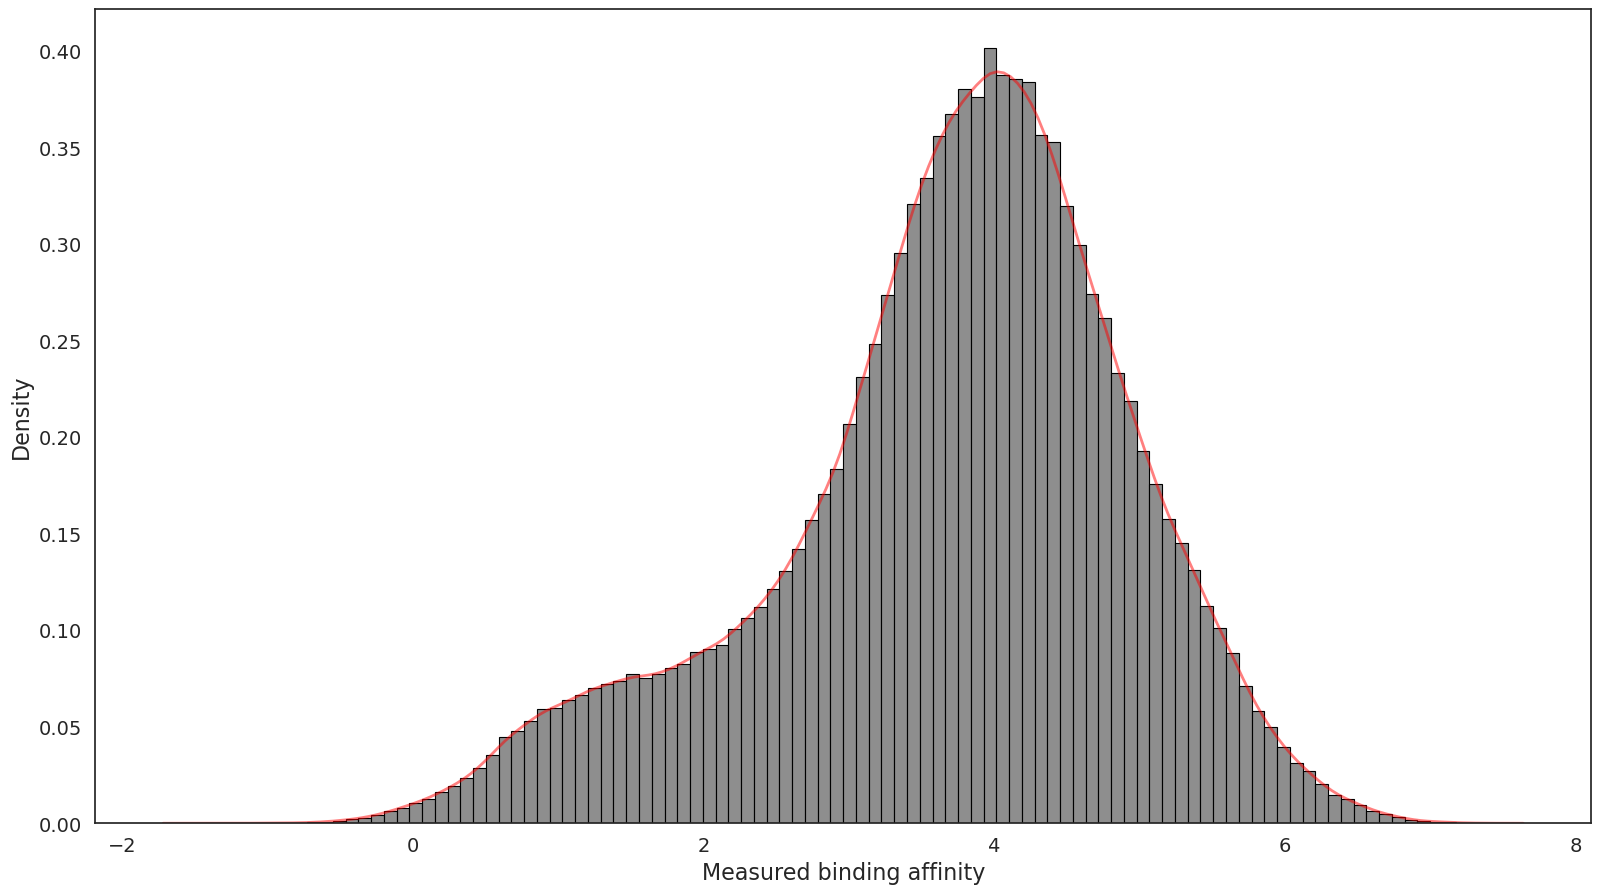

# entries with single seqs dropped 73741


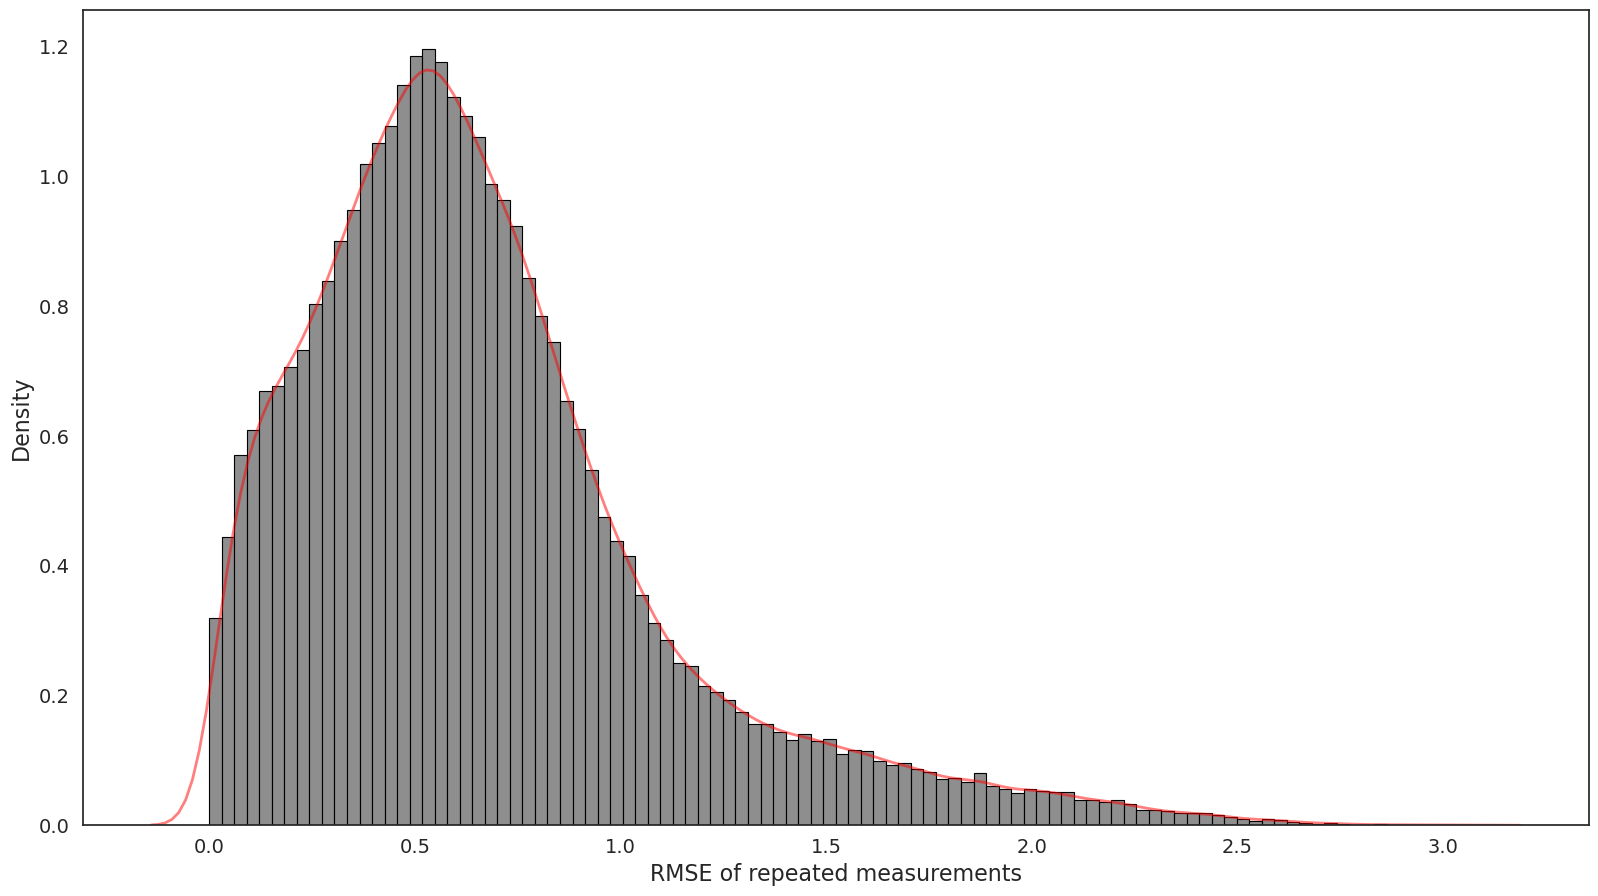

In [1]:
import os
import math  
import sklearn.metrics 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_value_distribution(df, value_col:str, x_label:str, save_as:str=None):
    """ 
    Plots the given value distribution. 
    """
    sns.set_theme()
    sns.set_context('talk')
    sns.set(style='white')
    plt.figure(figsize=(16, 9))
    plt.rcParams['font.family'] = 'sans-serif'

    # Create histogram and kde plot
    sns.histplot(df[value_col], kde=False, stat='density', bins=100, color='dimgrey', edgecolor='black')
    sns.kdeplot(df[value_col], color='red', linewidth=2, alpha=0.5)

    plt.tight_layout()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.show()

alpha_seq_data = pd.read_csv('../../data/alphaseq/MITLL_AAlphaBio_Ab_Binding_dataset.csv')
alpha_seq_data = alpha_seq_data[['POI','Sequence', 'Pred_affinity']]

# = Remove NaN values =
na_free = alpha_seq_data.dropna()
print('# na free entries:', len(na_free)) 

# = Check for duplicate sequences by identifying unique sequences =
sequence_set = set()
for seq in na_free['Sequence']:
    sequence_set.add(seq)
print('# unique entries:', len(sequence_set)) # 87807 unique sequences

# = Calculate RMSE =
na_free = na_free.copy()  
# Group by POI and calculate mean for each group
na_free['Mean_affinity'] = na_free.groupby('POI')['Pred_affinity'].transform('mean')
# Calculate the difference squared
na_free['differencesquared'] = (na_free['Pred_affinity'] - na_free['Mean_affinity']) ** 2
# Calculate the MSE for each group
na_free['mse'] = na_free.groupby('POI')['differencesquared'].transform('mean')
# Calculate the RMSE
na_free['rmse'] = np.sqrt(na_free['mse'])
print('# entries w/ rmse calculated:', len(na_free))

# = Drop replicates using sequences =
dedup_alpha_seq = na_free.drop_duplicates(subset='Sequence', keep='first')
print('# dedup entries:', len(dedup_alpha_seq)) # 87807
plot_value_distribution(alpha_seq_data, "Pred_affinity", "Measured binding affinity")

# = Drop single sequences =
dups_only = dedup_alpha_seq[dedup_alpha_seq['rmse'] != 0.0]
print('# entries with single seqs dropped', len(dups_only))
plot_value_distribution(dups_only, "rmse", "RMSE of repeated measurements")